In [340]:
import imgaug as ia
from imgaug import augmenters as iaa


sometimes = lambda aug: iaa.Sometimes(0.4, aug)
often = lambda aug: iaa.Sometimes(0.8, aug)

seq = iaa.Sequential([
    
    iaa.Fliplr(0.5),  # horizontally flip 50% of the images
    often(iaa.Affine(
        # scale images to 80-120% of their size, individually per axis
        scale={"x": (0.95, 1.05), "y": (0.95, 1.05)},
        # translate by -20 to +20 percent (per axis)
        translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
        rotate=(-8, 8),  # rotate by -45 to +45 degrees
        shear=(-5, 5),  # shear by -16 to +16 degrees
        order=[3],  # use nearest neighbour or bilinear interpolation (fast)
        cval=(0),  # if mode is constant, use a cval between 0 and 255
        # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        mode='constant'
    )),
    sometimes(iaa.Add((-8, 8))), # change brightness of images (by -10 to 10 of original value)
    sometimes(iaa.AddToHueAndSaturation((-8, 8))), # change hue and saturation
    sometimes(iaa.PiecewiseAffine(scale=(0.00, 0.02), order=3)),
    sometimes(iaa.ContrastNormalization((0.5, 1.5))),
    often(iaa.GaussianBlur(sigma=(0, 0.3))),  # blur images with a sigma of 0 to 3.0
#     (iaa.ElasticTransformation(alpha=(0.0, 1.5), sigma=(9.0, 10))),
    
])


In [341]:
from PIL import Image
import numpy as np

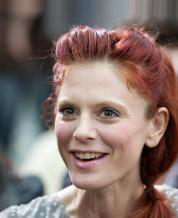

In [342]:
img_ = Image.open('/sdh/data/celebA/all_imgs/000002.jpg')
img_

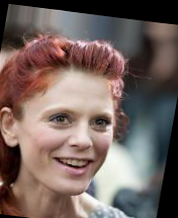

In [345]:
img = Image.fromarray(seq.augment_image(np.array(img_)))
img

In [ ]:
b
